In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import read_config_utils as cu

import time

import sys
import os

from os.path import exists

In [3]:




#input_dir = 'bootstrap-toy-study6b-1d-1a'
#input_dir = 'bootstrap-toy-study6b-1d-1a-badres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-goodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-verygoodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-perfect'


#input_dir = 'simple-pdf-toy-study6b-1d-1a-1k'


#input_dir = 'fit-pdf-toy-study-1d-1a'

#input_dir = 'hist-pdf-toy-study-1d-1a'

#input_dir = 'bootstrap-toy-study8a-1d-1c'

#input_dir = 'bootstrap-toy-study8a-1d-1d'

#input_dir = 'hist-pdf-toy-study-1d-1b-mediumbad'

input_dir = 'bootstrap-toy-study8a-1d-1d'

input_dir = 'bootstrap-toy-study8a-1d-1d-gpu0'


ncalc = 1000
npoints = 1000


ncalc = 2000
npoints = 2000




In [4]:
with open('%s/train-and-true-samples.npy' % input_dir,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)


In [5]:
train_pts.shape

(100000, 1)

In [6]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()

In [7]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 1




## Check the particle and detector distributions

<function matplotlib.pyplot.show(close=None, block=None)>

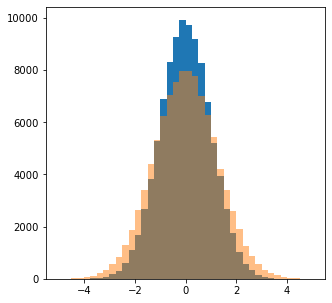

In [8]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))

hbins=40
x0min=-5
x0max=5
x1min=-6
x1max=6

for fi in range(ndim) :
    
    if ndim > 1 :
        thisax = ax[fi]
    else :
        thisax = ax
        
    thisax.hist( train_pts[:,fi], bins=hbins, range=[x0min,x0max] )
    thisax.hist( train_det_pts[:,fi], bins=hbins, range=[x0min,x0max], alpha=0.5 )
    

plt.show

In [9]:
n_samples = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d bootstrap samples.\n\n" % n_samples )



 Found 447 bootstrap samples.




## Load the weights for the first ncalc events from all of the bootstraps

In [10]:
bootstrap_weights = np.zeros( shape = (n_samples, ncalc) )

In [11]:
for fi in range(n_samples) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        print( 'loading %s' % fname )
        with open(fname,'rb') as f :
            this_bootstrap_weights = np.load(f)
        bootstrap_weights[fi,:] = this_bootstrap_weights[0:ncalc]
        
    else :
        print("\n\n *** file %s does not exist!\n\n" % fname )
        sys.exit()
        


loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-000.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-001.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-002.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-003.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-004.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-005.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-006.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-007.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-008.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-009.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-010.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-011.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-012.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-013.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-014

loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-148.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-149.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-150.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-151.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-152.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-153.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-154.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-155.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-156.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-157.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-158.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-159.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-160.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-161.npy
loading bootstrap-toy-study8a-1d-1d-gpu0/bootstrap-weights-162

In [12]:

corr_array = np.zeros( ncalc )
print(" ncalc = %d" % ncalc)

point_index = 57

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


 ncalc = 2000


<function matplotlib.pyplot.show(close=None, block=None)>

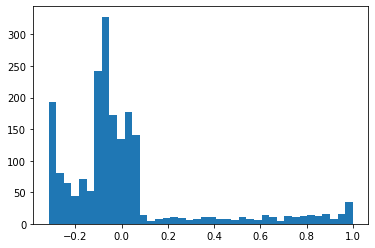

In [13]:
plt.hist( corr_array, bins=40)
plt.show

In [14]:
df0 = train_pts[:,0] - train_pts[point_index,0]


<function matplotlib.pyplot.show(close=None, block=None)>

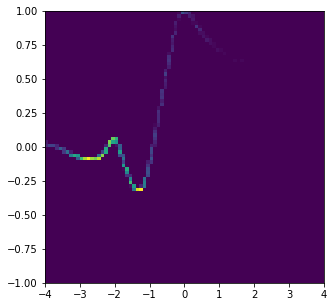

In [15]:
fig,ax = plt.subplots( 1, 1, figsize=(5,5))
ax.hist2d( df0[:ncalc], corr_array, bins=[80,80], range=([-4,4],[-1,1]))

plt.show

In [16]:
%%time



for point_index in range(npoints) :
    
    if (point_index % (npoints/10) == 0 ) :
        print(" Working on point %3d" % point_index)
        
    this_point_corr_array = np.zeros(ncalc)
    
    for i in range(ncalc) :
        #if i == point_index : continue
        pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
        this_point_corr_array[i] = pair_cor[0,1]
    
    if point_index == 0 :
        all_points_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        all_points_dr = np.sqrt( all_points_df0*all_points_df0)

        all_points_corr_array = this_point_corr_array
        all_points_f0b = train_pts[:ncalc,0]

    else :
        this_point_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        this_point_dr = np.sqrt( this_point_df0*this_point_df0 )

        all_points_df0 = np.append( all_points_df0, this_point_df0 )
        all_points_dr = np.append( all_points_dr, this_point_dr )

        all_points_corr_array = np.append(all_points_corr_array, this_point_corr_array)
        all_points_f0b = np.append(all_points_f0b, train_pts[:ncalc,0] )



 Working on point   0
 Working on point 200
 Working on point 400
 Working on point 600
 Working on point 800
 Working on point 1000
 Working on point 1200
 Working on point 1400
 Working on point 1600
 Working on point 1800
CPU times: user 3min 50s, sys: 16.1 s, total: 4min 6s
Wall time: 4min 6s


In [17]:
all_points_corr_array.shape

(4000000,)

In [18]:
all_points_df0.shape

(4000000,)

<function matplotlib.pyplot.show(close=None, block=None)>

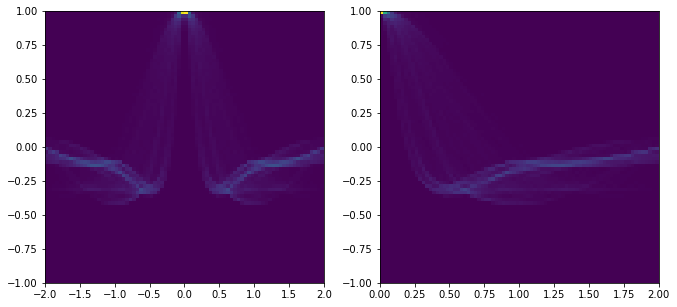

In [19]:
xmax = 2

fig,ax = plt.subplots( 1, 2, figsize=(11,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], range=([-1*xmax,xmax],[-1,1]))
ax[1].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], range=([0,xmax],[-1,1]))

#plt.savefig('plots/correlation-vs-distance-%s.png' % sample_name, bbox_inches='tight')
#plt.savefig('plots/correlation-vs-distance-%s.pdf' % sample_name, bbox_inches='tight')

plt.show

## Save the output

In [20]:
with open( '%s/correlations.npy' % input_dir, 'wb') as f :
    np.save(f, all_points_df0)
    np.save(f, all_points_corr_array)
    

In [21]:
with open( '%s/correlation-points-feature-coords.npy' % input_dir, 'wb') as f :
    np.save(f, all_points_f0b)
